In [7]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from Coeffs import *
import itertools
import os
import glob
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

# $ qq\to t \bar{t}$, $|\mathcal{M}_{qq\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$ 

In [8]:
files_qq = list(glob.glob('/home/vinicius/EFT_ToyModel/xsec_processFolders/xsecs/*qq*.txt'))
pts_q_eft = []
err_q_eft = []
pts_q_uv = []
err_q_uv = []
m_psiT = []
m_SDM = []
for f in files_qq:
    data = np.loadtxt(f, delimiter=',', comments='#')
    for row in data:
        if 'uv_bsm' in f:
            pts_q_uv.append(row[2])
            err_q_uv.append(row[3])
        else:
            pts_q_eft.append(row[2])
            err_q_eft.append(row[3])
            m_psiT.append(row[0])
            m_SDM.append(row[1])
            
pts_q_eft = np.array(pts_q_eft)
err_q_eft = np.array(err_q_eft)
pts_q_uv = np.array(pts_q_uv)
err_q_uv = np.array(err_q_uv)
m_psiT = np.array(m_psiT)/1000.0
m_SDM = np.array(m_SDM)/1000.0
print(m_psiT)

[ 0.175  0.19   0.2    0.21   0.225  0.25   0.3    0.4    0.5    0.6
  0.7    0.8    0.9    1.     1.15   1.25   1.35   1.5    2.     2.5
  3.     4.     5.     6.     7.     8.     9.    10.   ]


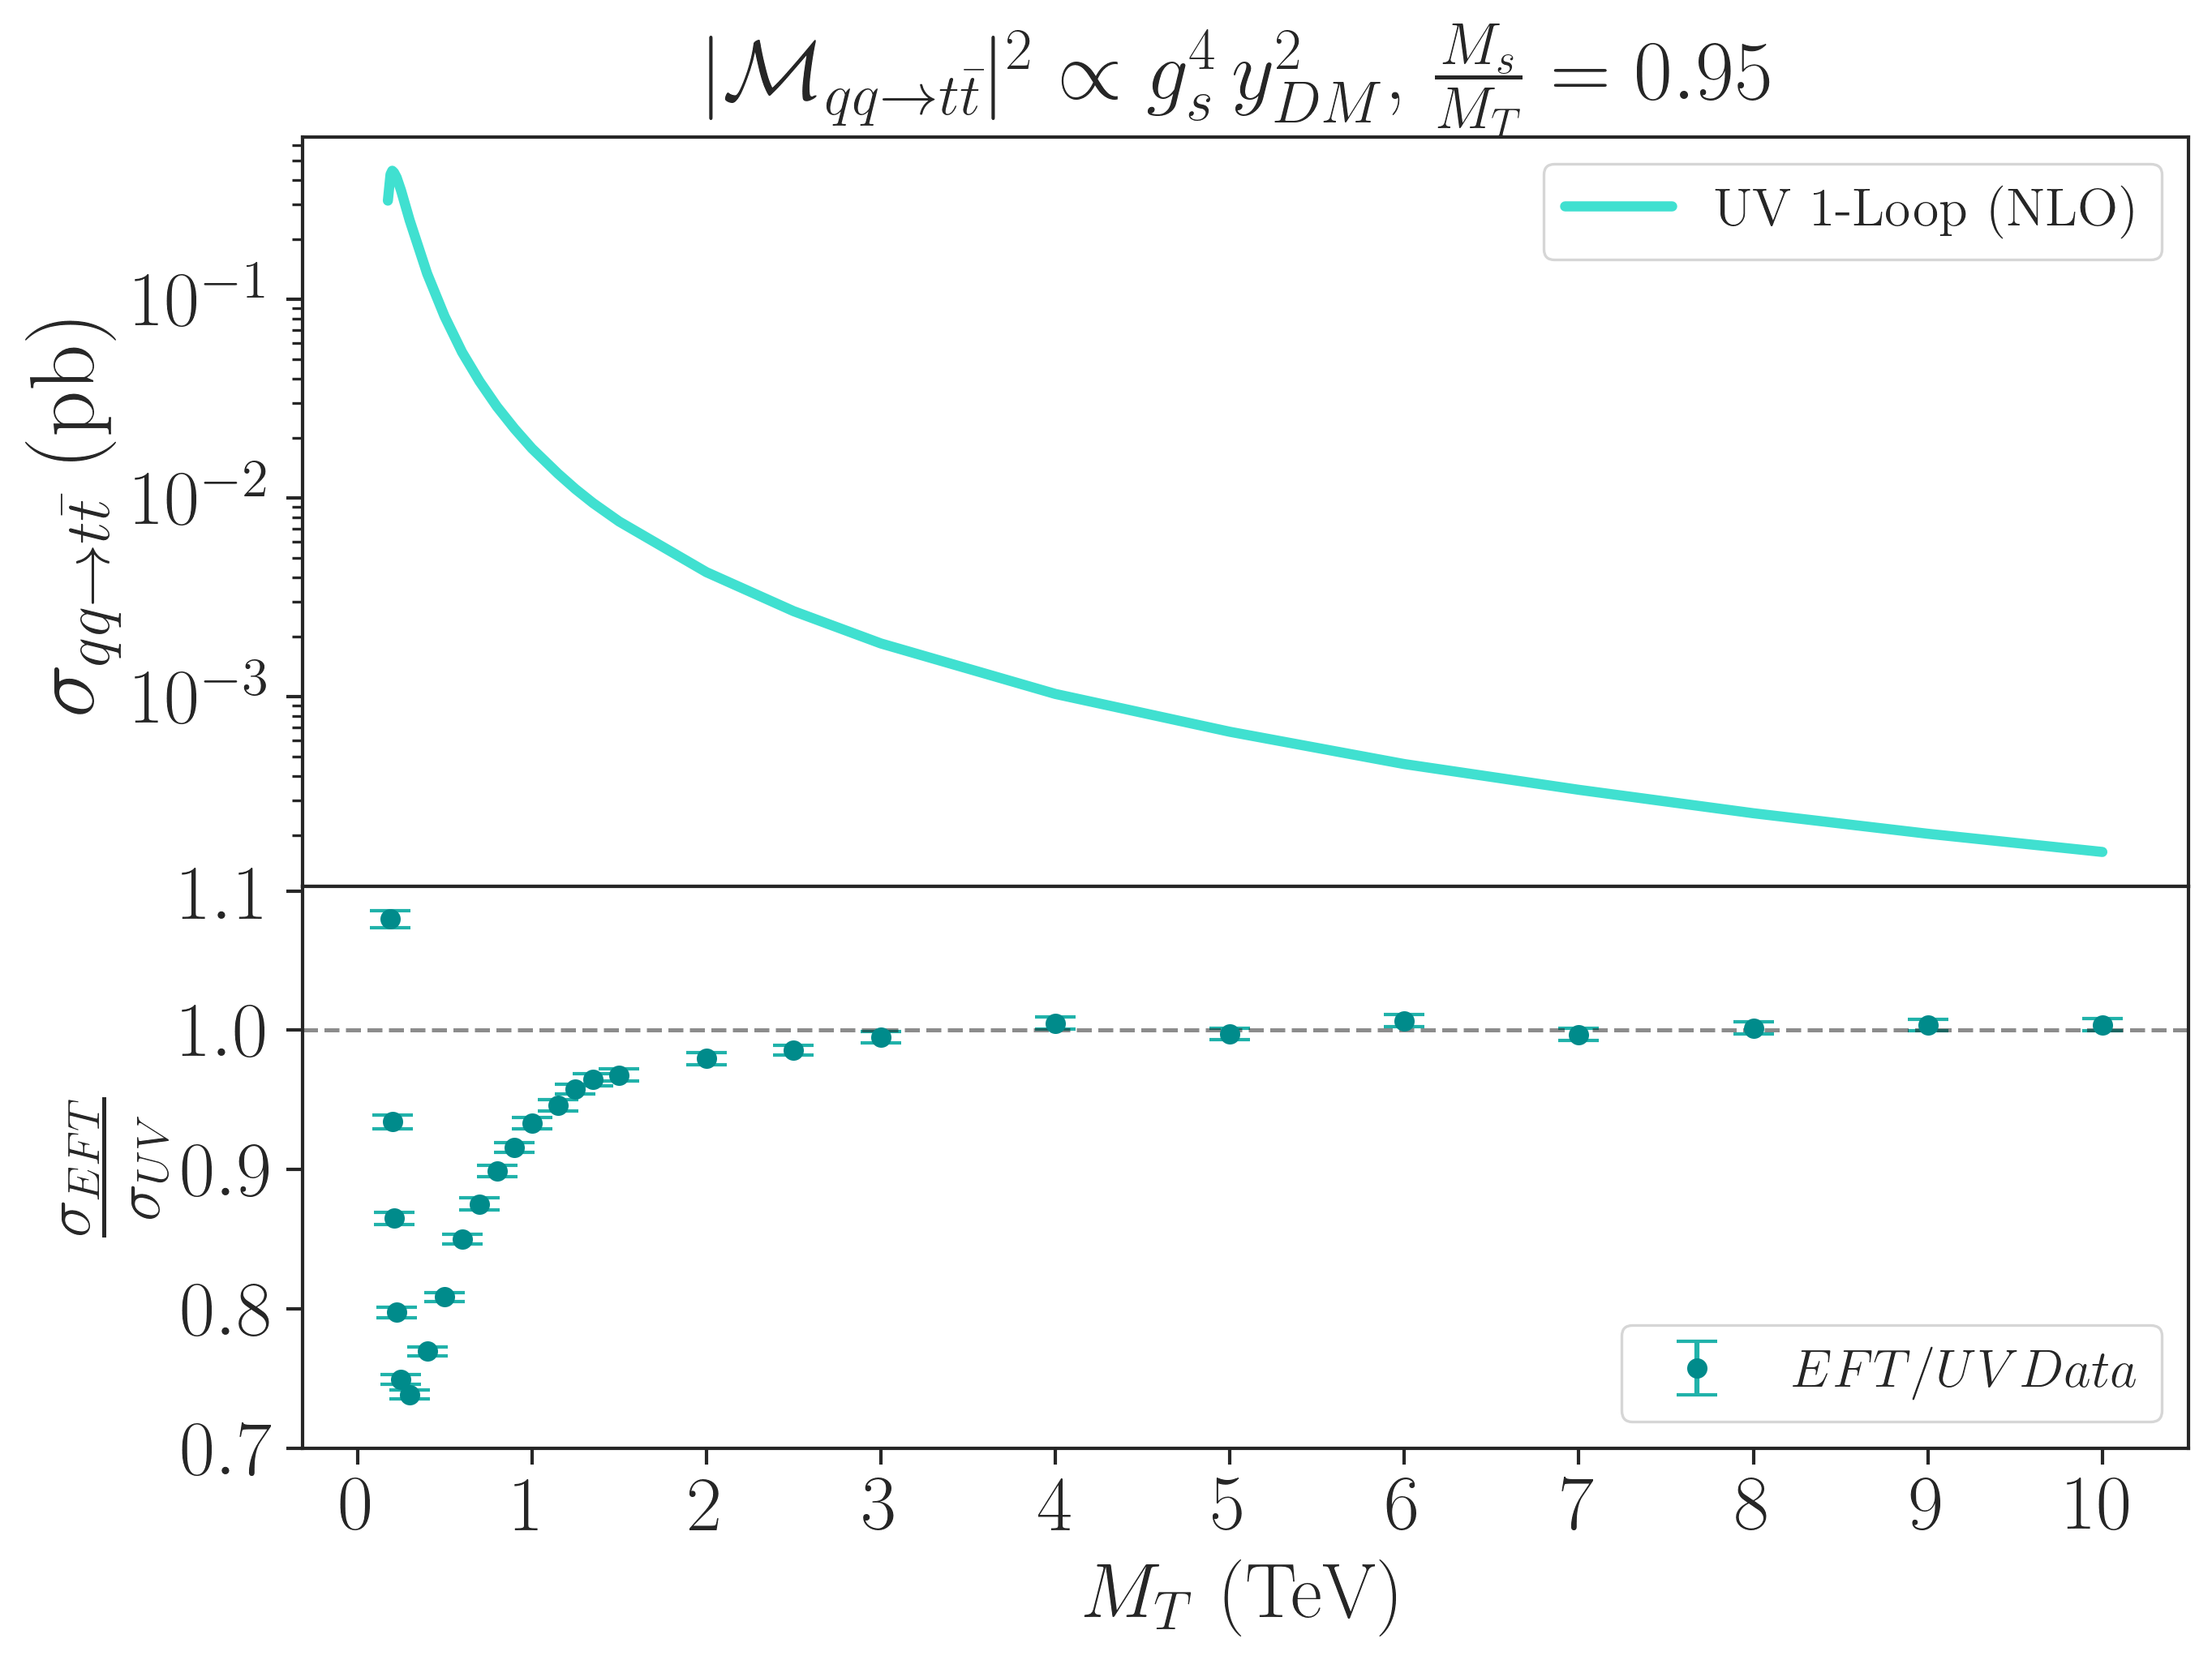

In [9]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 6])
axs = gs.subplots(sharex=True)

#Gráfico principal
#axs[0].errorbar(m_psiT,pts_q_eft,yerr = err_q_eft, fmt ='o', ms = 3.0, capsize=3, 
          #      color = 'royalblue', label = 'EFT' )
axs[0].plot(m_psiT,pts_q_uv, lw = 3, 
                color = 'Turquoise', label = 'UV 1-Loop (NLO)')

axs[0].set_ylabel(r'$\sigma_{qq\to t\bar{t}}$ (pb)', fontsize = 27)
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}_{qq\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$, $\frac{M_s}{M_T} = 0.95$ ', fontsize = 25)
axs[0].set_yscale('log')
axs[0].tick_params(axis='y', labelsize=23)


#Gráfico de resíduos
diff = (pts_q_eft )/pts_q_uv
err = abs(diff)*np.sqrt((err_q_uv/pts_q_uv)**2 + (err_q_eft/pts_q_eft)**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_psiT[1:], diff[1:], yerr=err[1:],
                fmt='o',                  # Marker style
                ms=5.0,                   # Marker size
                color='darkcyan',         # Marker face color
                ecolor='lightseagreen',   # Error bar color
                elinewidth=1.5,           # Error bar line thickness
                capsize=6,                # Size of the caps
                capthick=1, label = '$EFT/UV Data$')               # Thickness of the caps
axs[1].axhline(y=1, color='k',alpha = 0.5, linestyle='--')
#axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT}}{\sigma_{UV}}$', fontsize = 27.0)
#axs[1].set_ylim([-1,1])
axs[1].set_yticks(np.arange(0.7, 1.2,0.1))
axs[1].legend(loc = 'lower right')

#axs[1].set_yscale('log')

plt.xlabel(r'$M_{T}$ (TeV)', fontsize= 23.0)
plt.xticks(np.arange(0,11,1), fontsize = 23.0)
plt.yticks(fontsize = 23)
plt.savefig('/home/vinicius/TeXProjects/Qualification_Text/qq2ttbar_CS.png')
plt.show()

# $ g g\to t \bar{t}$, $|\mathcal{M}_{gg\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$ 

In [10]:
files_gg = list(glob.glob('/home/vinicius/EFT_ToyModel/xsec_processFolders/xsecs/*gg*.txt'))
pts_g_eft = []
err_g_eft = []
pts_g_uv = []
err_g_uv = []
m_psiT1 = []
m_SDM1 = []
for f in files_gg:
    data = np.loadtxt(f, delimiter=',', comments='#')
    for row in data:
        if 'uv_bsm' in f:
            pts_g_uv.append(row[2])
            err_g_uv.append(row[3])
        else:
            pts_g_eft.append(row[2])
            err_g_eft.append(row[3])
            m_psiT1.append(row[0])
            m_SDM1.append(row[1])
            
pts_g_eft = np.array(pts_g_eft)
err_g_eft = np.array(err_g_eft)
pts_g_uv = np.array(pts_g_uv)
err_g_uv = np.array(err_g_uv)
m_psiT1 = np.array(m_psiT1)/1000.0
m_SDM1 = np.array(m_SDM1)/1000.0

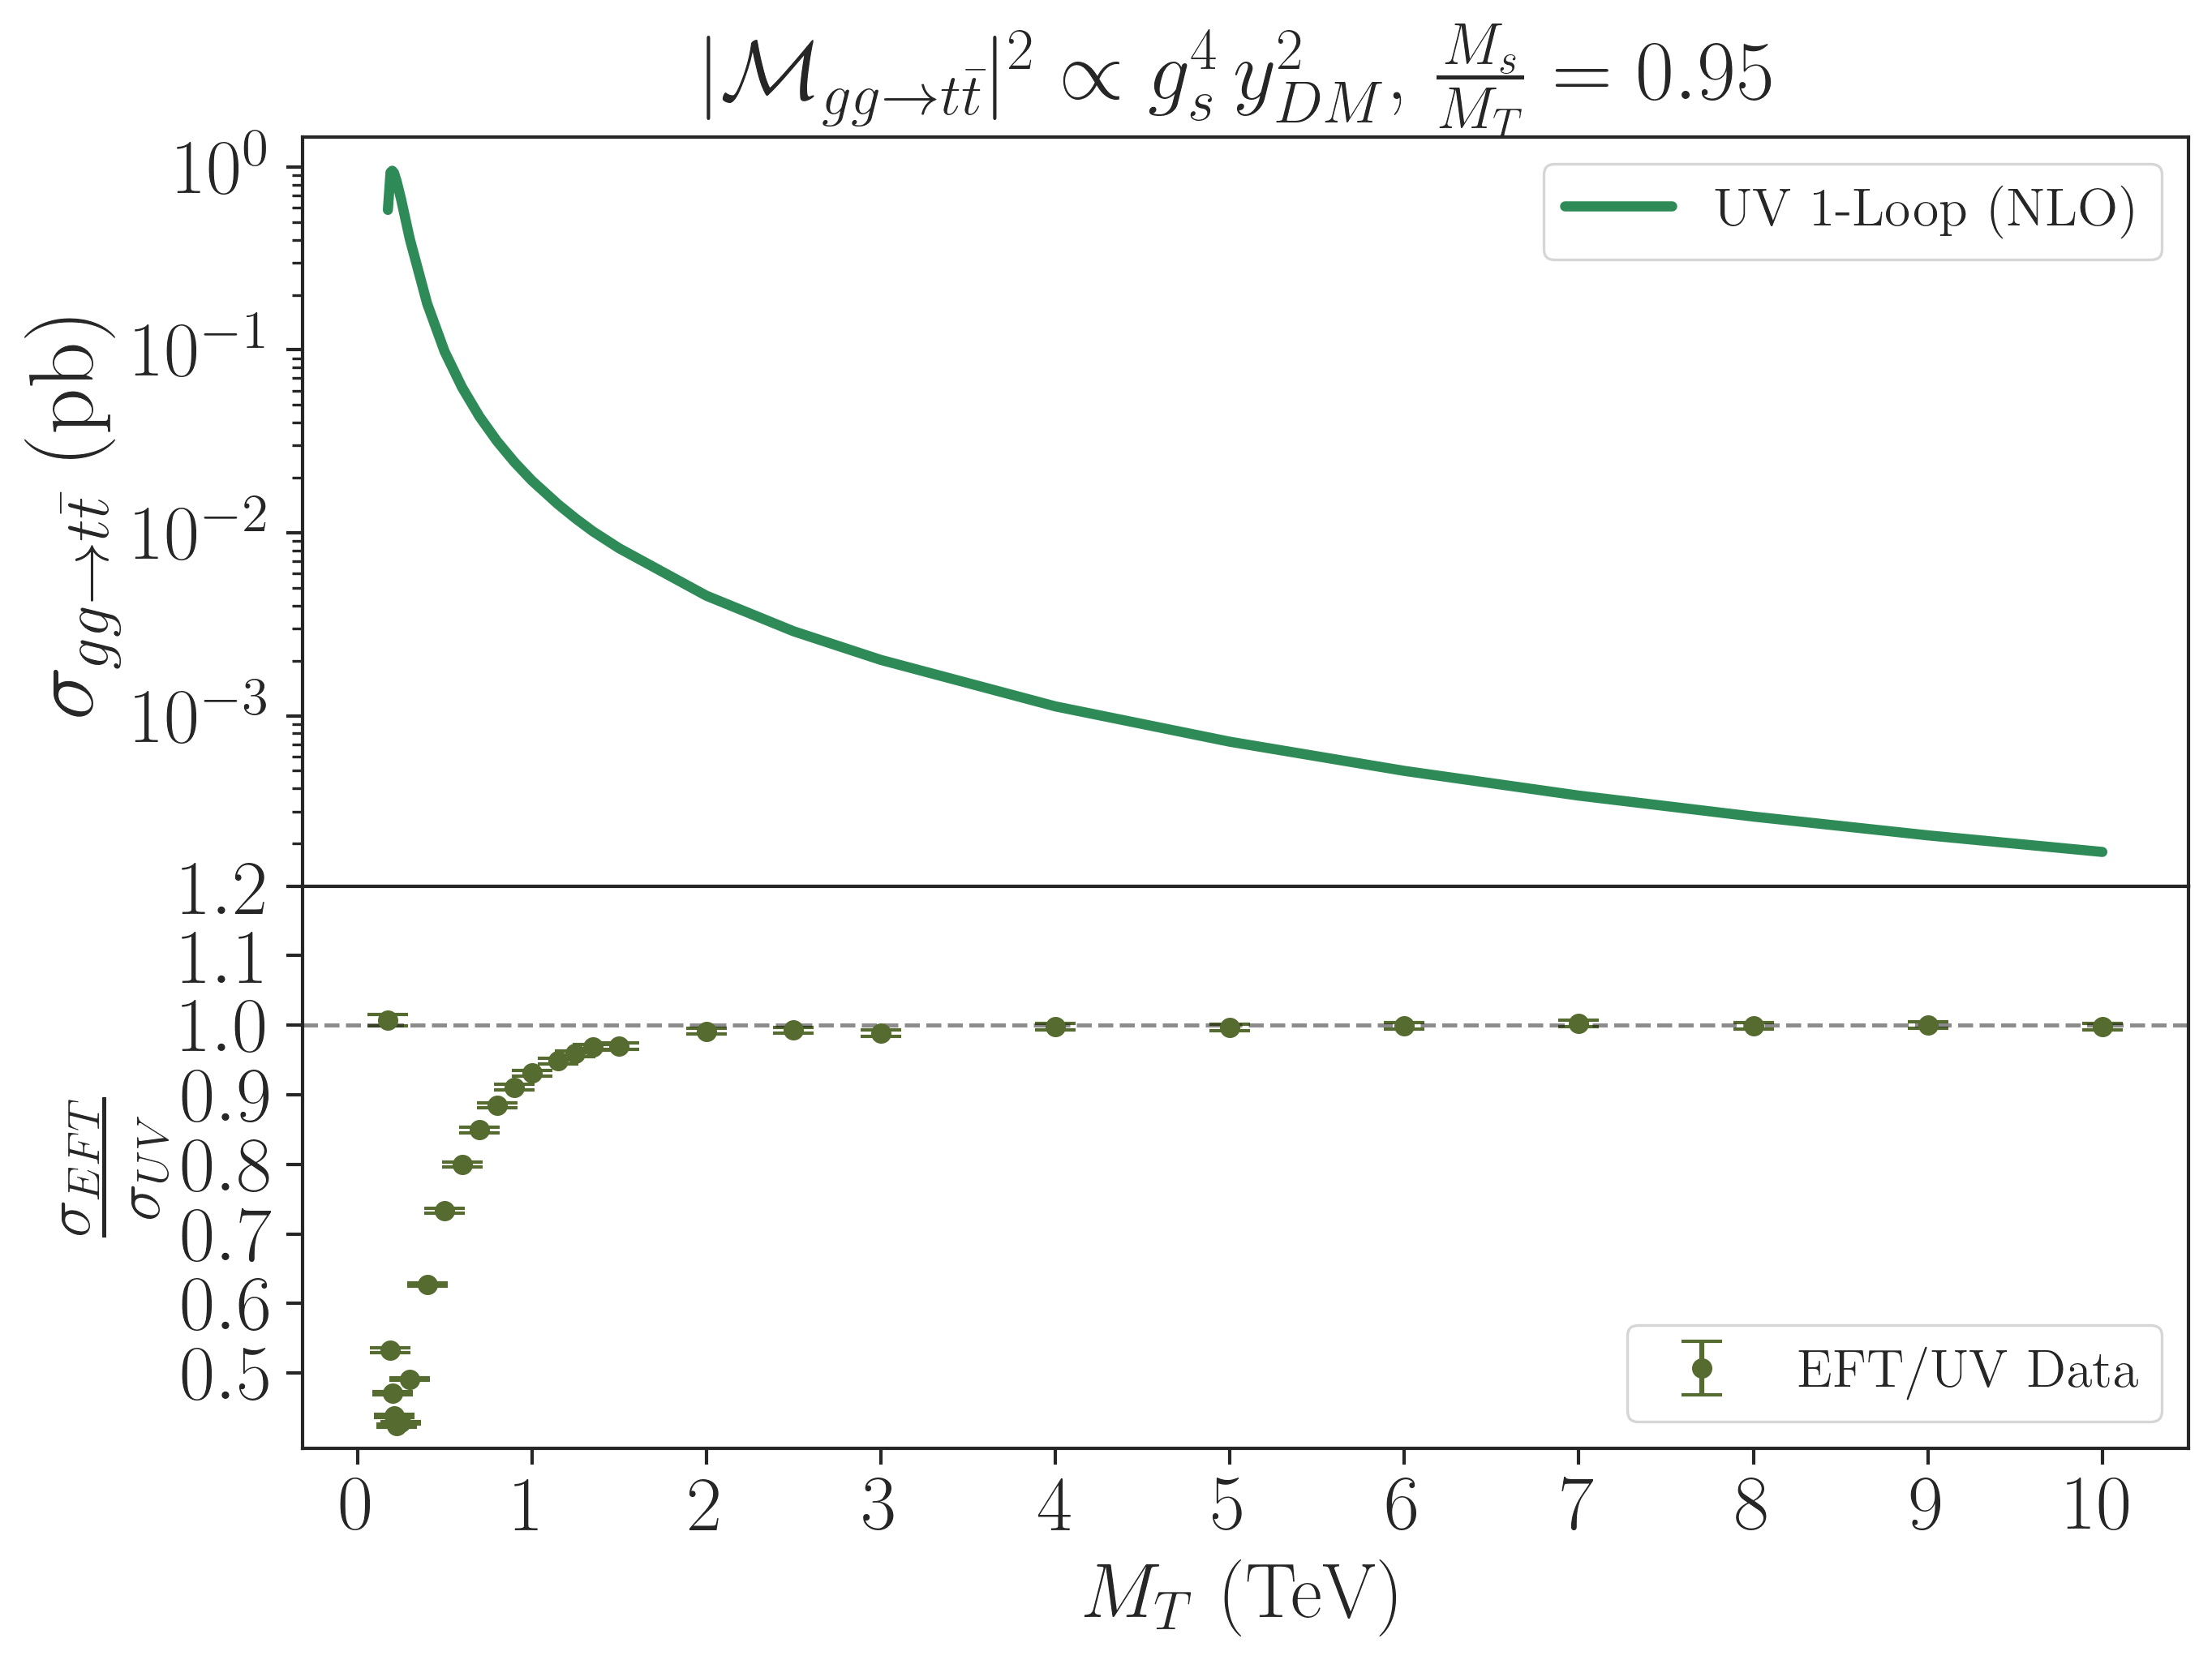

In [11]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 6])
axs = gs.subplots(sharex=True)

#Gráfico principal
#axs[0].errorbar(m_psiT1,pts_g_eft,yerr = err_g_eft,fmt = 'o', ms = 3.0, capsize=3, 
 #               color = 'brown', label = 'EFT' )
#axs[0].errorbar(m_psiT3,pts_g_uv,err_g_uv,0, 'o', ms = 3.0, capsize=3, 
 #               color = 'seagreen', label = 'UV 1-Loop (NLO)' )
axs[0].plot(m_psiT1,pts_g_uv, lw = 3.0, 
                color = 'seagreen' , label = 'UV 1-Loop (NLO)')
axs[0].set_ylabel(r'$\sigma_{gg\to t\bar{t}}$ (pb)', fontsize = 27)
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}_{gg\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$, $\frac{M_s}{M_T} = 0.95$  ', fontsize = 25)
axs[0].set_yscale('log')
axs[0].tick_params(axis='y', labelsize=23)


#Gráfico de resíduos
diff1 = (pts_g_eft )/pts_g_uv
err1 = abs(diff1)*np.sqrt((err_g_uv/pts_g_uv)**2 + (err_g_eft/pts_g_eft)**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_psiT1, diff1, yerr=err1,
                fmt='o',                  # Marker style
                ms=5.0,                   # Marker size
                color='darkolivegreen',         # Marker face color
                ecolor='darkolivegreen',   # Error bar color
                elinewidth=1.5,           # Error bar line thickness
                capsize=6, label = 'EFT/UV Data')              # Size of the caps

#axs[1].plot(m_psiT3,diff1,
 #               color = 'palegreen', label = 'EFT - UV 1-Loop' )
axs[1].axhline(y=1.0, color='k',alpha = 0.5, linestyle='--')
#axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT}}{\sigma_{UV}}$', fontsize = 27)
#axs[1].set_ylim([-1,1])
axs[1].set_yticks(np.arange(0.5, 1.3,0.1))
axs[1].legend(loc = 'lower right')

#axs[1].set_yscale('log')


plt.xlabel(r'$M_{T}$ (TeV)', fontsize= 23.0)
plt.xticks(np.arange(0,11,1), fontsize = 23.0)
plt.yticks(fontsize = 23)
plt.savefig('/home/vinicius/TeXProjects/Qualification_Text/gg2ttbar_CS.png')
plt.show()